In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [2]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [3]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_Analysis/Cars Dataset.csv', sep=',',quotechar='"')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   577 non-null    object
 1   Year    577 non-null    int64 
 2   Km/h    577 non-null    int64 
 3   Color   577 non-null    object
 4   Type    577 non-null    object
 5   Fuel    577 non-null    object
 6   Price   577 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 31.7+ KB


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataset.head()

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009,165000,Gray,Automatic,Gasoline,560000
1,Hyundai Elantra,2010,194000,Black,Automatic,Gasoline,600000
2,Hyundai Elantra HD,2010,205000,Silver,Automatic,Gasoline,575000
3,Hyundai Elantra,2010,160000,Black,Automatic,Gasoline,550000
4,Hyundai Elantra,2009,140451,Eggplant,Automatic,Gasoline,650000


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['Model', 'Type', 'Color', 'Fuel']] = enc_.fit_transform(dataset[['Model', 'Type', 'Color', 'Fuel']])

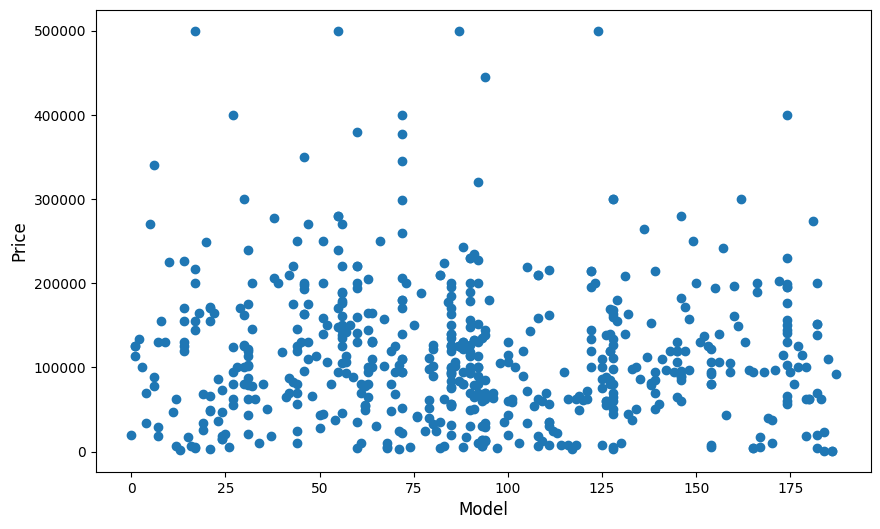

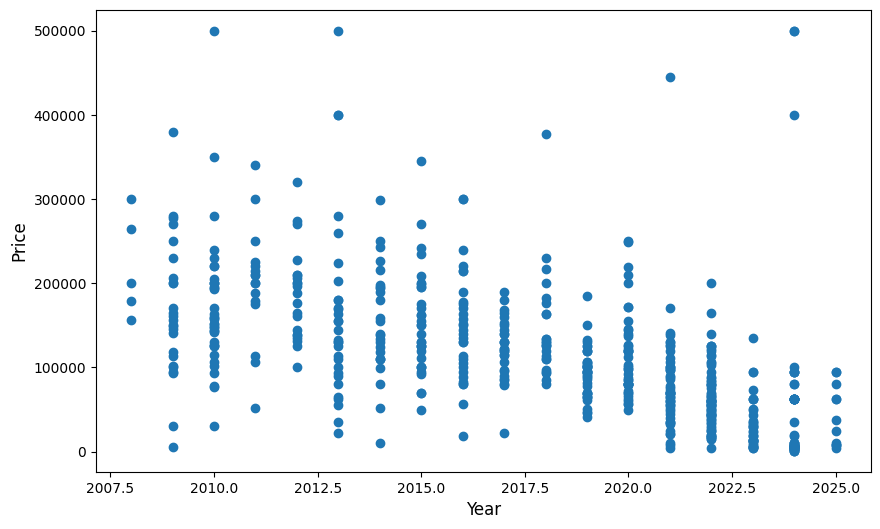

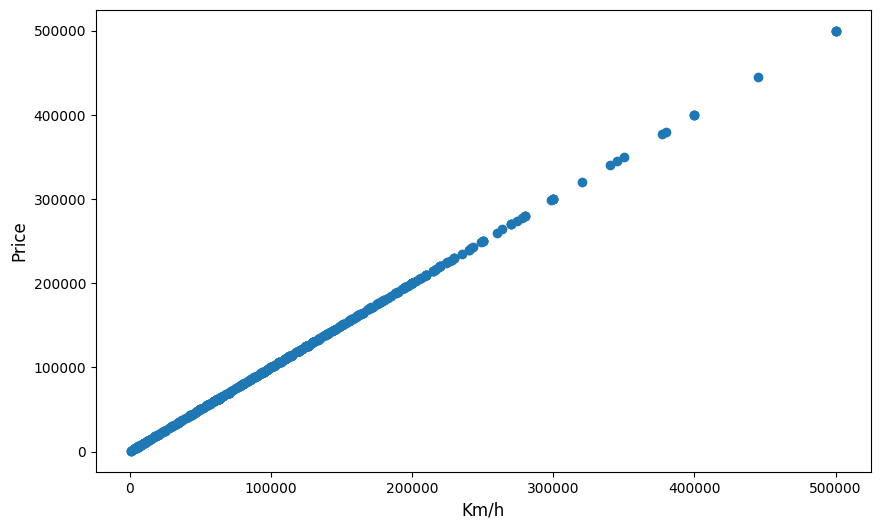

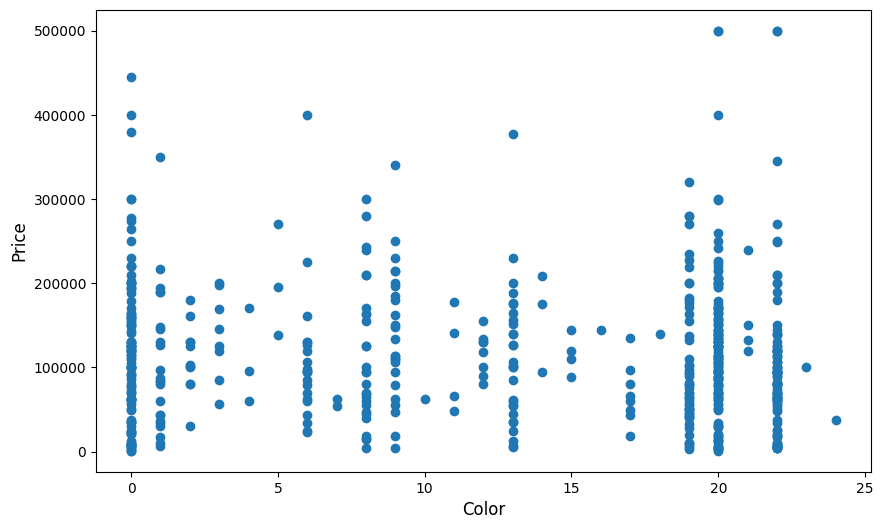

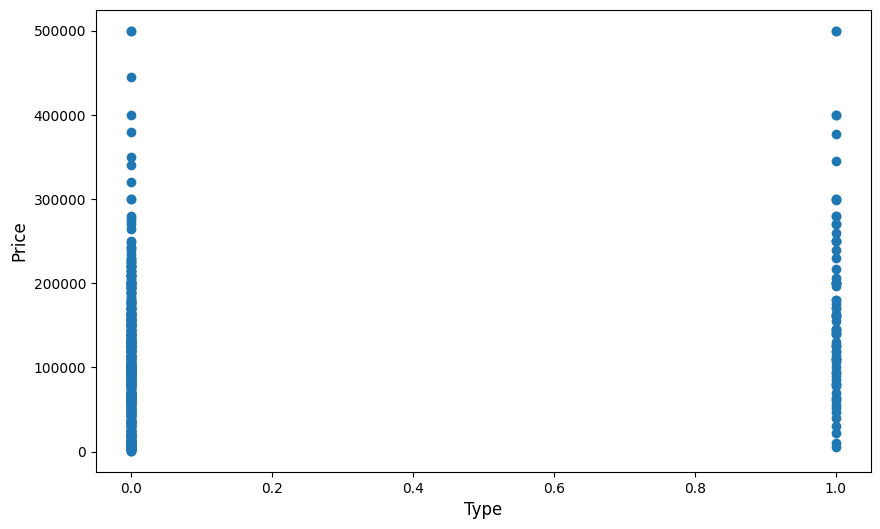

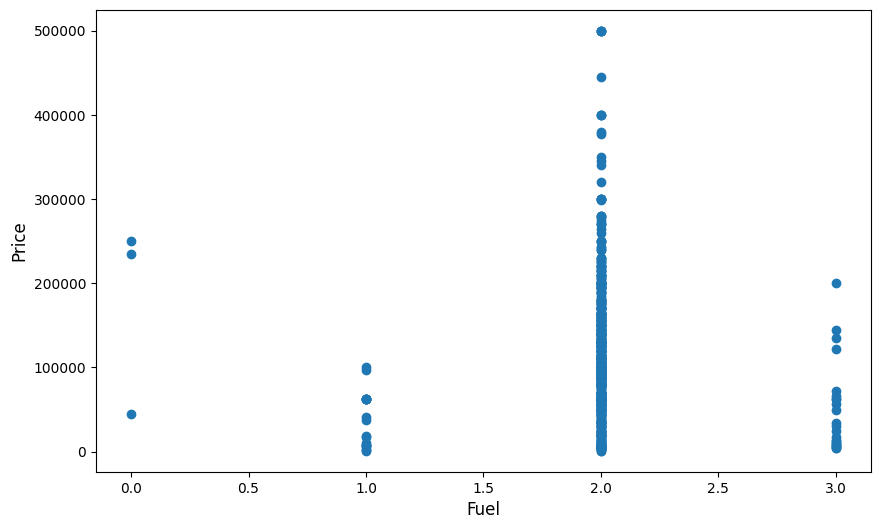

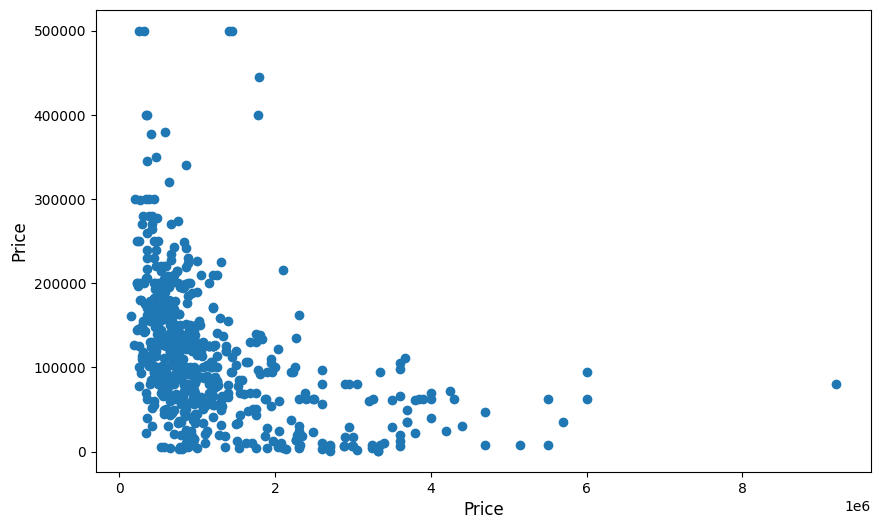

In [9]:
for index in dataset.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset[index], dataset['Km/h'])
    plt.ylabel('Price', size=12)
    plt.xlabel(index, size=12)
    plt.show()

In [10]:
# подготавливаем датасет к обучению

X = dataset.drop(['Price'], axis=1)
y = dataset['Price']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (577, 6) | y shape: (577,) 


In [11]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [12]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [13]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)


RMSE:  1015072.4748
  R2: 0.3395
 Adjusted R2: 0.3031
 Cross Validated R2: 0.2628


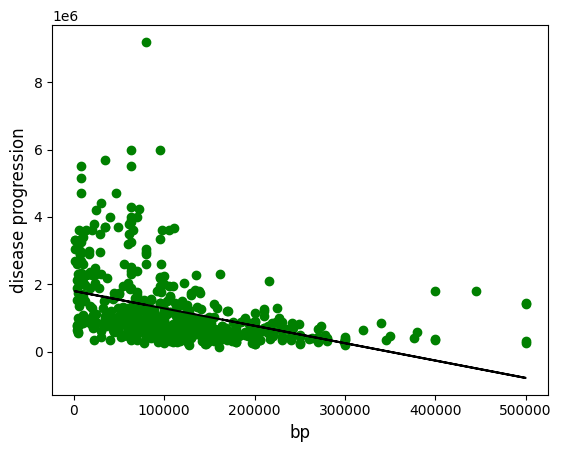

In [14]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dataset['Km/h'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['Price'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('bp', size=12)
plt.show()



# Полиномиальная регрессия

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [16]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  1158716.7225
  R2: -0.2759
 Adjusted R2: -1.4525
 Cross Validated R2: -8.2298


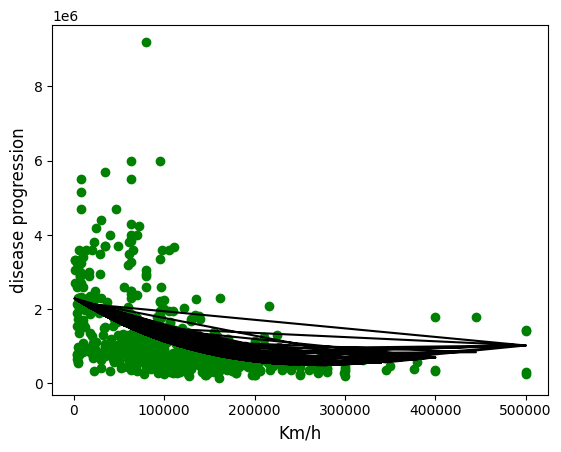

In [17]:
X2 = dataset['Km/h'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['Price'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Km/h', size=12)
plt.show()


# Регрессия дерева принятия решений


In [18]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [19]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  1170496.2696
  R2: 0.1217
 Adjusted R2: 0.0734
 Cross Validated R2: 0.1529


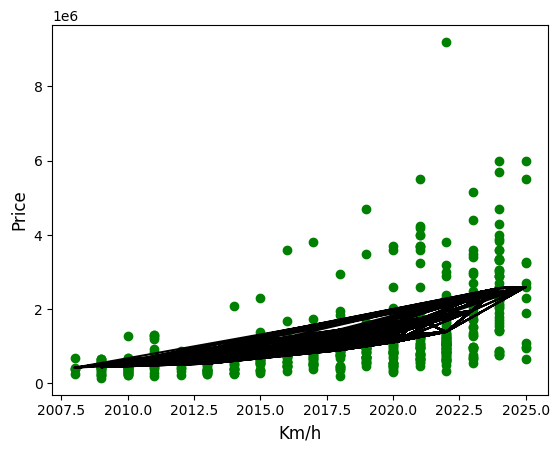

In [20]:
X2 = dataset['Year'].values[:,np.newaxis]
y2 = dataset['Price'].values


model2 = DecisionTreeRegressor()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price', size=12)
plt.xlabel('Km/h', size=12)
plt.show()

# Регрессия случайного леса


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  899966.4944
  R2: 0.4808
 Adjusted R2: 0.4522
 Cross Validated R2: 0.5495


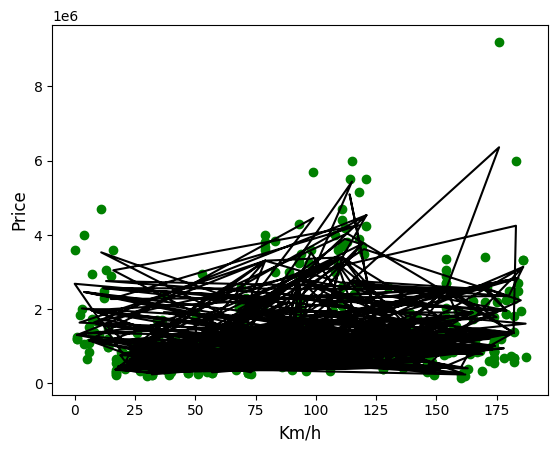

In [22]:
X2 = dataset['Model'].values[:,np.newaxis]
y2 = dataset['Price'].values


model2 = RandomForestRegressor(n_estimators=500)
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price', size=12)
plt.xlabel('Km/h', size=12)
plt.show()

# Регрессия опорных векторов (SVR)

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

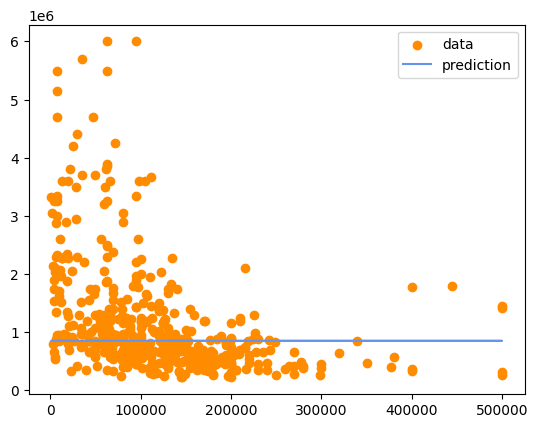

In [30]:
plt.scatter(X_train["Km/h"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Km/h"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [23]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1321195.7371
  R2: -0.119
 Adjusted R2: -0.1806
 Cross Validated R2: -0.1428


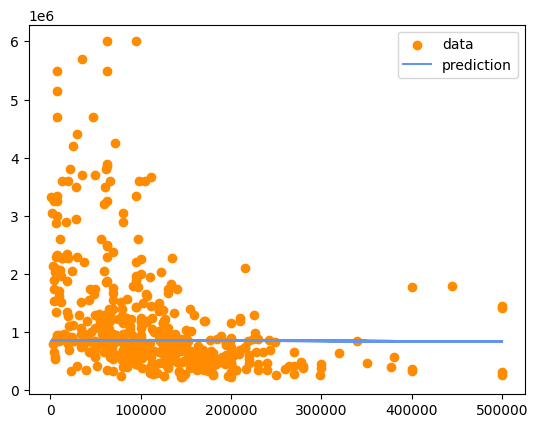

In [25]:
plt.scatter(X_train["Km/h"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Km/h"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [26]:

# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1322890.8937
  R2: -0.1219
 Adjusted R2: -0.1836
 Cross Validated R2: -0.1434


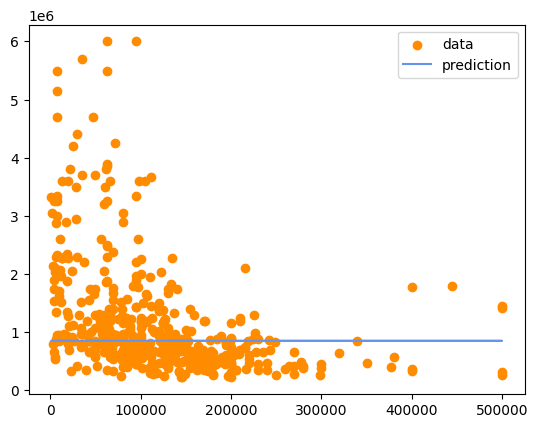

In [27]:
plt.scatter(X_train["Km/h"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Km/h"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet

In [28]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  1015348.4657
  R2: 0.3391
 Adjusted R2: 0.3027
 Cross Validated R2: 0.2646


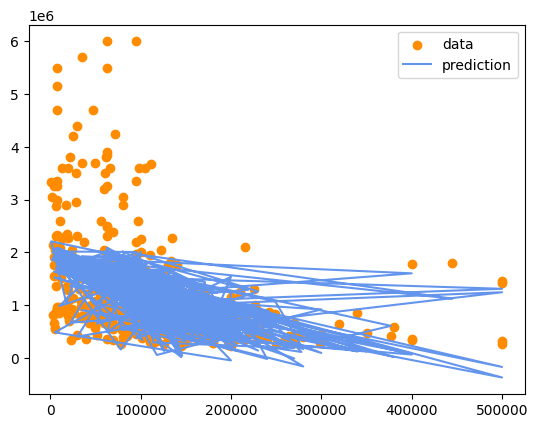

In [29]:
plt.scatter(X_train["Km/h"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Km/h"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Задание

Попробовать методы регрессии на своих наборах данных.
Работа будет засчитана, если коэффициент детерминации будет не меньше, чем 0.85.
Чтобы достигнуть этой метрики вам понадобится:
1. загрузить данные
1. проанализировать их
1. предобработать данные
1. попробовать разные методы регрессии
1. получить метрики
1. визуализировать регрессию на одном из параметров